https://www.kaggle.com/competitions/playground-series-s3e2/discussion


https://www.kaggle.com/competitions/playground-series-s3e1/discussion

In [1]:
DATA_DIR='playground-series-s3e3/'

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import importlib

In [3]:
#load and reload if changed functions for data investigation, plots etc
import data_investigation_lib as DI
#importlib.reload(data_investigation_lib);

In [4]:
df=pd.read_csv(DATA_DIR+"/train.csv").iloc[:,1:] #drop ID
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,...,80,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,...,80,1,4,3,3,4,2,0,3,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,...,80,2,4,3,3,3,2,1,2,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,...,80,0,15,1,1,6,0,0,2,0
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,...,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,Female,...,80,0,10,2,4,10,0,0,8,0
1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,Male,...,80,1,10,3,4,4,2,1,3,0
1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,Male,...,80,0,1,2,3,1,0,0,0,1
1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,Male,...,80,2,10,3,2,10,3,0,8,0


In [5]:
df.describe(percentiles=[0, 1/3, 2/3, 1])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,2.791890,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,1.097396,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33.3%,31.000000,684.666667,3.000000,3.000000,1.0,2.000000,57.000000,3.000000,1.000000,2.000000,...,80.0,0.000000,7.000000,2.000000,3.000000,4.000000,2.000000,0.000000,2.000000,0.000000
50%,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,3.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
66.7%,39.000000,1116.000000,9.000000,3.000000,1.0,3.000000,79.000000,3.000000,2.000000,4.000000,...,80.0,1.000000,11.000000,3.000000,3.000000,8.000000,6.000000,1.000000,7.000000,0.000000
100%,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000
max,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [6]:
DI.nans(df)

0 rows with nans out of 1677
0 nans Age
0 nans BusinessTravel
0 nans DailyRate
0 nans Department
0 nans DistanceFromHome
0 nans Education
0 nans EducationField
0 nans EmployeeCount
0 nans EnvironmentSatisfaction
0 nans Gender
0 nans HourlyRate
0 nans JobInvolvement
0 nans JobLevel
0 nans JobRole
0 nans JobSatisfaction
0 nans MaritalStatus
0 nans MonthlyIncome
0 nans MonthlyRate
0 nans NumCompaniesWorked
0 nans Over18
0 nans OverTime
0 nans PercentSalaryHike
0 nans PerformanceRating
0 nans RelationshipSatisfaction
0 nans StandardHours
0 nans StockOptionLevel
0 nans TotalWorkingYears
0 nans TrainingTimesLastYear
0 nans WorkLifeBalance
0 nans YearsAtCompany
0 nans YearsInCurrentRole
0 nans YearsSinceLastPromotion
0 nans YearsWithCurrManager
0 nans Attrition


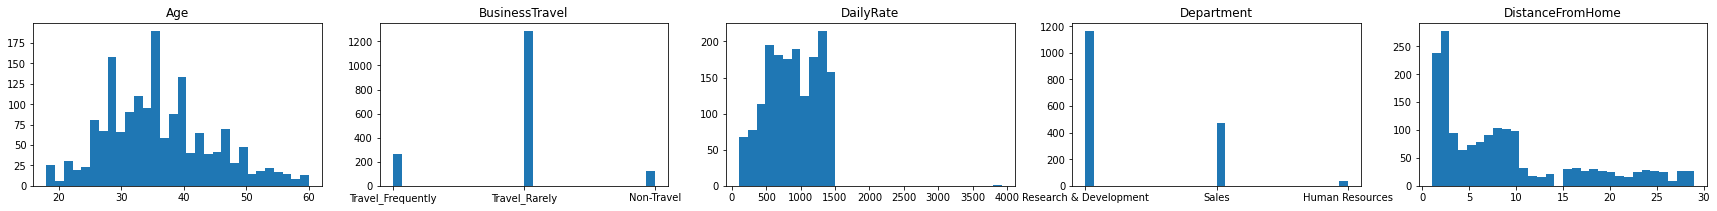

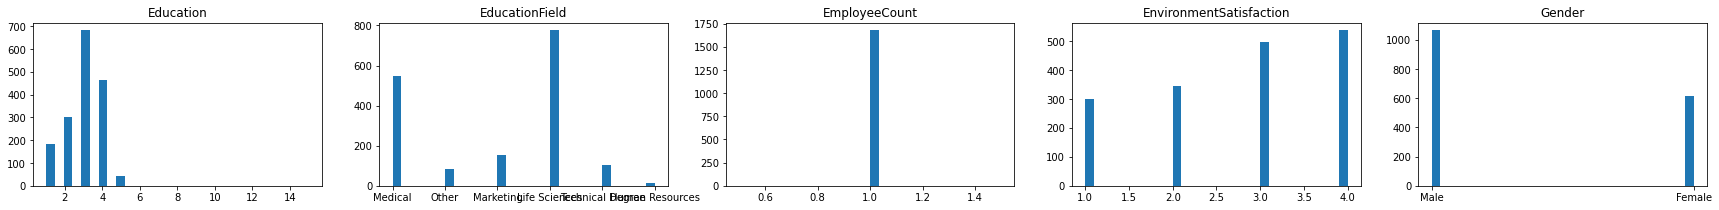

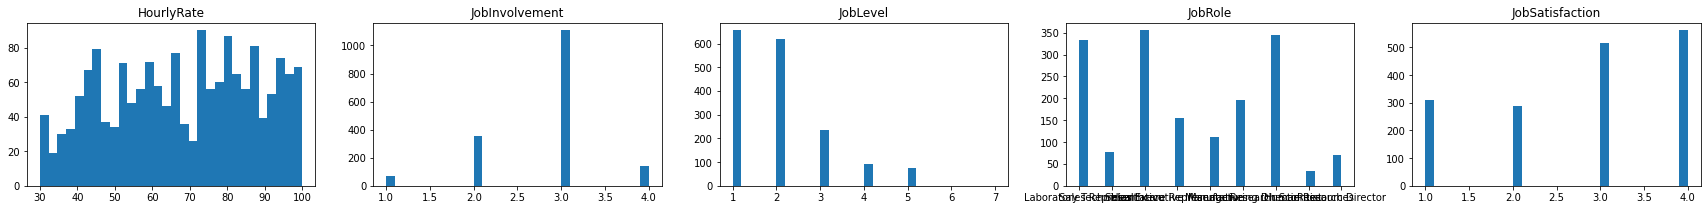

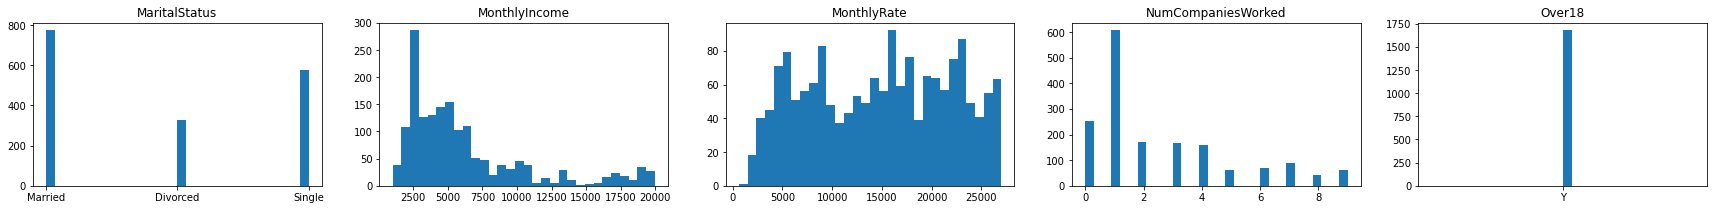

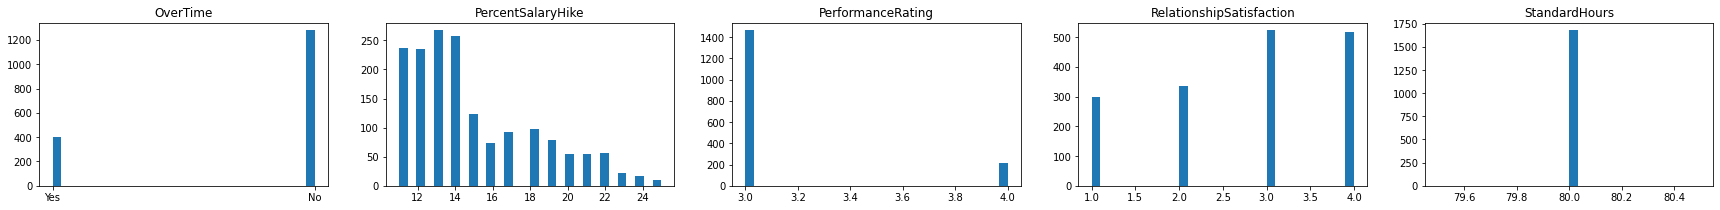

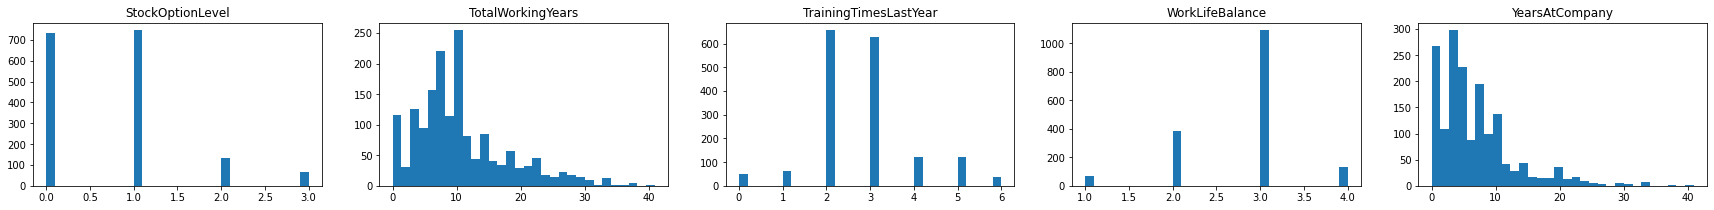

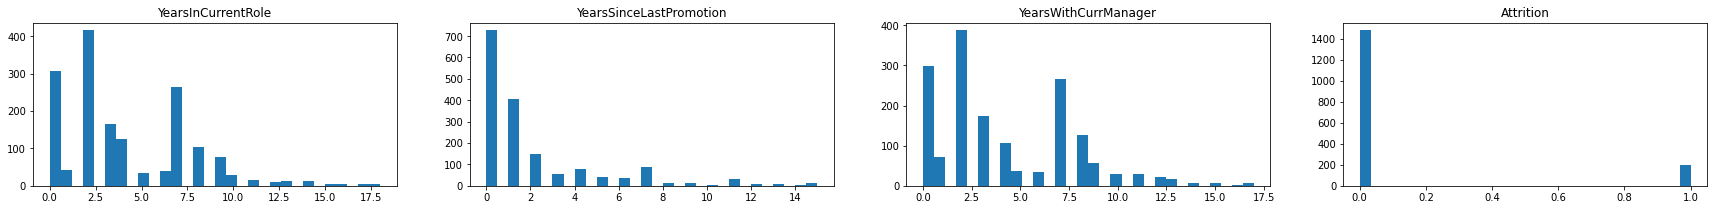

In [11]:
DI.hists(df.iloc[:,:5])
DI.hists(df.iloc[:,5:10])
DI.hists(df.iloc[:,10:15])
DI.hists(df.iloc[:,15:20])
DI.hists(df.iloc[:,20:25])
DI.hists(df.iloc[:,25:30])
DI.hists(df.iloc[:,30:])

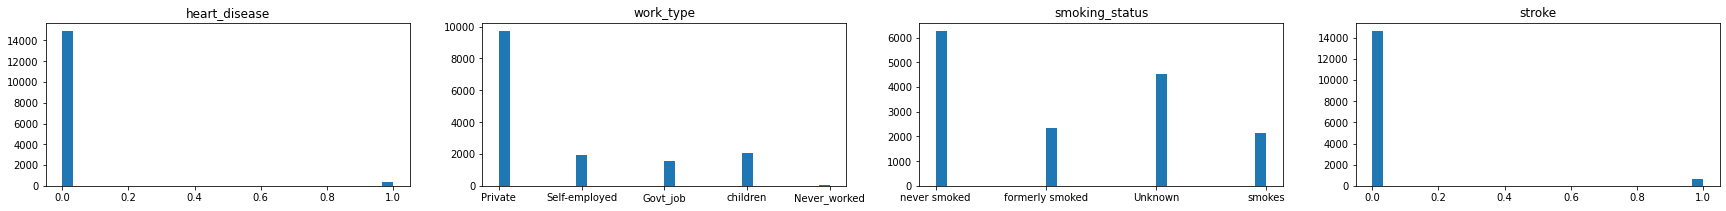

In [77]:
DI.hists(df.loc[:,['heart_disease','work_type','smoking_status','stroke']]) #closer look

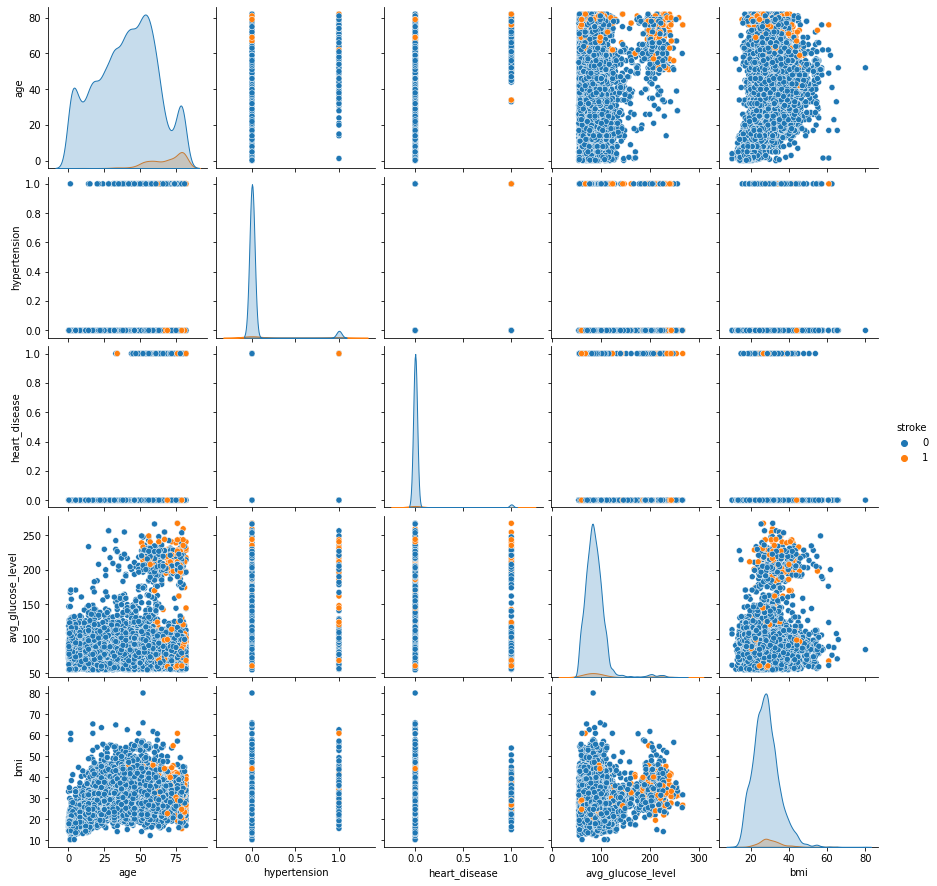

In [107]:
import seaborn as sns
sns.pairplot(df,hue="Attrition")

In [96]:
from catboost import CatBoostClassifier, Pool, cv
cat = CatBoostClassifier()

cat_feats=[]
for i in range(len(df.columns)):
    if df.dtypes[i]==np.object_:
        cat_feats.append(i)

X=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values
N=df.shape[0]
tr=N*9//10
cat.fit(X[:tr],y[:tr],cat_features=cat_feats,plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[[1472   55]
 [   1    3]]


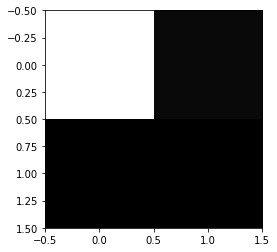

In [102]:
from sklearn.metrics import confusion_matrix
y_pred=cat.predict(X[tr:])
plt.imshow(confusion_matrix(y_pred,y[tr:]),'gray')
print(confusion_matrix(y_pred,y[tr:]))

In [9]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]